In [ ]:
import tensorflow as tf

from keras import * 

import matplotlib.pyplot as plt
import numpy as np


In [ ]:
from keras.applications.inception_v3 import InceptionV3, decode_predictions

In [ ]:
iv3 = InceptionV3()

96116736/96112376 [==============================] - 4s 0us/step


In [ ]:
iv3.summary()

In [ ]:
# ruta de datos (imagenes de gatos y perros)
PATH = '/content/drive/My Drive/Dogs vs cats/train/train'

imgurls = !ls -1 '{PATH}'

imgurls[0]

"ls: cannot open directory '/content/drive/My Drive/Dogs vs cats/train/train': Input/output error"

In [ ]:
from keras.preprocessing import image

x = image.img_to_array(image.load_img(PATH + '/' + 'dog.12499.jpg', target_size=(299, 299, 3)))

x = ((x / 255) - 1)*2

x = x.reshape([1, x.shape[0], x.shape[1], x.shape[2]])

print(x.shape)

(1, 299, 299, 3)


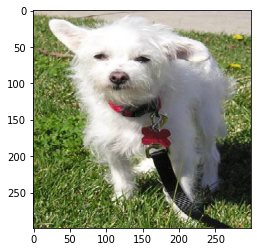

In [ ]:
plt.imshow((x[0] + 2)/2)

In [ ]:
# np.argmax(iv3.predict(x)) # aquí está la correspondencias de las clases: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

decode_predictions(iv3.predict(x))

[[('n02111889', 'Samoyed', 0.6809298),
  ('n02114548', 'white_wolf', 0.08901522),
  ('n02111500', 'Great_Pyrenees', 0.06144983),
  ('n02120079', 'Arctic_fox', 0.051439755),
  ('n02112018', 'Pomeranian', 0.008526677)]]

# Ataques adversarios

In [ ]:
# Vamos a intentar que el perro lo detecte como un limon (clase 951)

target_class = 900

inp_layer = iv3.layers[0].input
out_layer = iv3.layers[-1].output

loss = out_layer[0, target_class]

grad = keras.backend.gradients(loss, inp_layer)[0]

optimize_gradient = keras.backend.function([inp_layer, keras.backend.learning_phase()], [grad, loss])

In [ ]:
adversarialx = np.copy(x)

cost = 0.0

lr = 2

while cost < 0.95:
  gr, cost = optimize_gradient([adversarialx, 0])

  adversarialx = + adversarialx + lr * gr

  print('Class target cost (= class probability): ', cost)

Class target cost (= class probability):  6.8730515e-05
Class target cost (= class probability):  7.0024784e-05
Class target cost (= class probability):  7.144062e-05
Class target cost (= class probability):  7.2963514e-05
Class target cost (= class probability):  7.462855e-05
Class target cost (= class probability):  7.643761e-05
Class target cost (= class probability):  7.831127e-05
Class target cost (= class probability):  8.024115e-05
Class target cost (= class probability):  8.222327e-05
Class target cost (= class probability):  8.4266765e-05
Class target cost (= class probability):  8.645099e-05
Class target cost (= class probability):  8.872731e-05
Class target cost (= class probability):  9.109977e-05
Class target cost (= class probability):  9.368815e-05
Class target cost (= class probability):  9.6487805e-05
Class target cost (= class probability):  9.943324e-05
Class target cost (= class probability):  0.00010251558
Class target cost (= class probability):  0.000105806714
Cl

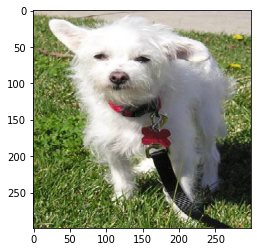

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


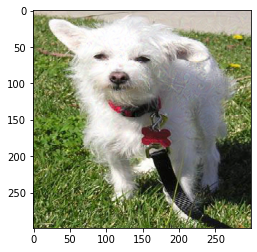

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


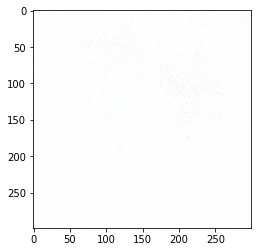

In [ ]:
plt.imshow((x[0] + 2)/2)
plt.show()
plt.imshow((adversarialx[0]+2)/2)
plt.show()

plt.imshow(((adversarialx[0] - x[0])+2)/2)
plt.show()

Haciendo esto, a veces los cambios son perceptibles al ojo humano, por lo que está claro que la imagen ha sido manipulada para engañar a la red neuronal. Esto no nos sirve. Queremos que no sea perceptible.

Para ellos estableceremos un intervalo en el que habrá que buscar un máximo para la función de pérdida quew hemos definido antes.

In [ ]:
pertur = 0.01

max_pertur = x + 0.01 #máxima perturbación en cada píxel
min_pertur = x - 0.01 #mínima perturbación en cada píxel


adversarialx = np.copy(x)

cost = 0.0

lr = 1

while cost < 0.95:
  gr, cost = optimize_gradient([adversarialx, 0])

  adversarialx = + adversarialx + lr * gr

  adversarialx = np.clip(adversarialx, min_pertur, max_pertur)

  print('Class target cost (= class probability): ', cost)


Class target cost (= class probability):  6.0428945e-05
Class target cost (= class probability):  6.0836373e-05
Class target cost (= class probability):  6.127121e-05
Class target cost (= class probability):  6.1715575e-05
Class target cost (= class probability):  6.216662e-05
Class target cost (= class probability):  6.2625724e-05
Class target cost (= class probability):  6.3097155e-05
Class target cost (= class probability):  6.358174e-05
Class target cost (= class probability):  6.408199e-05
Class target cost (= class probability):  6.460146e-05
Class target cost (= class probability):  6.514208e-05
Class target cost (= class probability):  6.569434e-05
Class target cost (= class probability):  6.625125e-05
Class target cost (= class probability):  6.680814e-05
Class target cost (= class probability):  6.737311e-05
Class target cost (= class probability):  6.7941815e-05
Class target cost (= class probability):  6.8518275e-05
Class target cost (= class probability):  6.910881e-05
Cla

In [ ]:
decode_predictions(iv3.predict(adversarialx))

[[('n04562935', 'water_tower', 0.9986884),
  ('n02114548', 'white_wolf', 0.00013045092),
  ('n03710193', 'mailbox', 9.0519585e-05),
  ('n04604644', 'worm_fence', 8.163628e-05),
  ('n04044716', 'radio_telescope', 6.151661e-05)]]

In [ ]:
from PIL import Image

im = Image.fromarray(adversarialx[0].astype(np.uint8))
im.save('/content/drive/My Drive/Dogs vs cats/train/perroadversario.jpg')

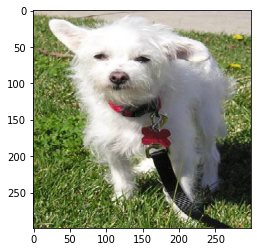

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


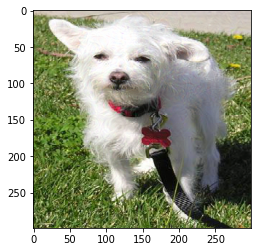

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


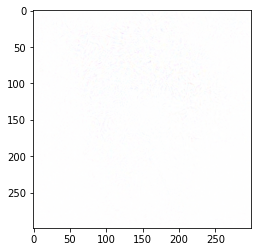

In [ ]:
plt.imshow((x[0] + 2)/2)
plt.show()
plt.imshow((adversarialx[0]+2)/2)
plt.show()

plt.imshow(((adversarialx[0] - x[0])+2)/2)
plt.show()